<a href="https://www.kaggle.com/code/mubashirjawad01/raw-fatal-pcg-mother-and-child-dataset?scriptVersionId=298326440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Library Setup**

In [13]:
import os
import glob
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os 
import glob 
import scipy.io
import seaborn as sns

# **Data Load**

In [14]:
folder_path = '/kaggle/input/datasets/mubashirjawad01/raw-fetal-pcg-contaminated-with-mothers-pcg' 

#searching for sub folder of.mat  when recursive = true  
search_pattern = os.path.join(folder_path, '**', '*.mat')
mat_files = glob.glob(search_pattern, recursive=True)

#data save dictonary 
all_data = {}

print(f"Total .mat files found: {len(mat_files)}\n")

#loading the file
if len(mat_files) > 0:
    for file_path in mat_files:
        file_name = os.path.basename(file_path)
        try:
            all_data[file_name] = scipy.io.loadmat(file_path)
            print(f" Loaded: {file_name}")
        except Exception as e:
            print(f" Error loading {file_name}: {e}")
            
    print("\n All files are loaded succesfully ")
else:
    print("didn't Find Any Folder")

Total .mat files found: 21

 Loaded: B2_P4_S1.mat
 Loaded: B1_P3_S2.mat
 Loaded: B2_P4_S3.mat
 Loaded: B1_P3_S1.mat
 Loaded: B2_P5_S1.mat
 Loaded: B2_P1_S3.mat
 Loaded: B2_P3_S1.mat
 Loaded: B2_P3_S2.mat
 Loaded: B2_P2_S2.mat
 Loaded: B2_P3_S3.mat
 Loaded: B2_P4_S2.mat
 Loaded: B2_P1_S2.mat
 Loaded: B1_P2_S1.mat
 Loaded: B2_P5_S2.mat
 Loaded: B2_P2_S1.mat
 Loaded: B2_P2_S3.mat
 Loaded: B1_P2_S2.mat
 Loaded: B2_P1_S1.mat
 Loaded: B2_P5_S3.mat
 Loaded: B1_P1_S2.mat
 Loaded: B1_P1_S1.mat

 All files are loaded succesfully 


In [32]:
print(df.columns)

Index(['B2_P4_S1.mat', 'B1_P3_S2.mat', 'B2_P4_S3.mat', 'B1_P3_S1.mat',
       'B2_P5_S1.mat', 'B2_P1_S3.mat', 'B2_P3_S1.mat', 'B2_P3_S2.mat',
       'B2_P2_S2.mat', 'B2_P3_S3.mat', 'B2_P4_S2.mat', 'B2_P1_S2.mat',
       'B1_P2_S1.mat', 'B2_P5_S2.mat', 'B2_P2_S1.mat', 'B2_P2_S3.mat',
       'B1_P2_S2.mat', 'B2_P1_S1.mat', 'B2_P5_S3.mat', 'B1_P1_S2.mat',
       'B1_P1_S1.mat'],
      dtype='object')


# **General Overview of the Loaded Data** 

In [15]:
import numpy as np

print("--- Dataset Overview ---")
for file_name, data in all_data.items():
    # Safely extract the sampling frequency
    fs = data['Fs'].item() 
    y = data['y']
    
    # Calculate duration in seconds
    num_samples = y.shape[0]
    num_channels = y.shape[1]
    duration = num_samples / fs
    
    print(f"File: {file_name:<15} | Fs: {fs} Hz | Channels: {num_channels} | "
          f"Samples: {num_samples:<8} | Duration: {duration:.2f} sec")

--- Dataset Overview ---
File: B2_P4_S1.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2615316  | Duration: 59.30 sec
File: B1_P3_S2.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2626727  | Duration: 59.56 sec
File: B2_P4_S3.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2619558  | Duration: 59.40 sec
File: B1_P3_S1.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2611899  | Duration: 59.23 sec
File: B2_P5_S1.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2802195  | Duration: 63.54 sec
File: B2_P1_S3.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2608793  | Duration: 59.16 sec
File: B2_P3_S1.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2629138  | Duration: 59.62 sec
File: B2_P3_S2.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2619119  | Duration: 59.39 sec
File: B2_P2_S2.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2621258  | Duration: 59.44 sec
File: B2_P3_S3.mat    | Fs: 44100 Hz | Channels: 2 | Samples: 2621492  | Duration: 59.44 sec
File: B2_P4_S2.mat    | Fs: 44100 Hz | Channe

# **Plotting the Raw PCG Signals (Time Domain)**

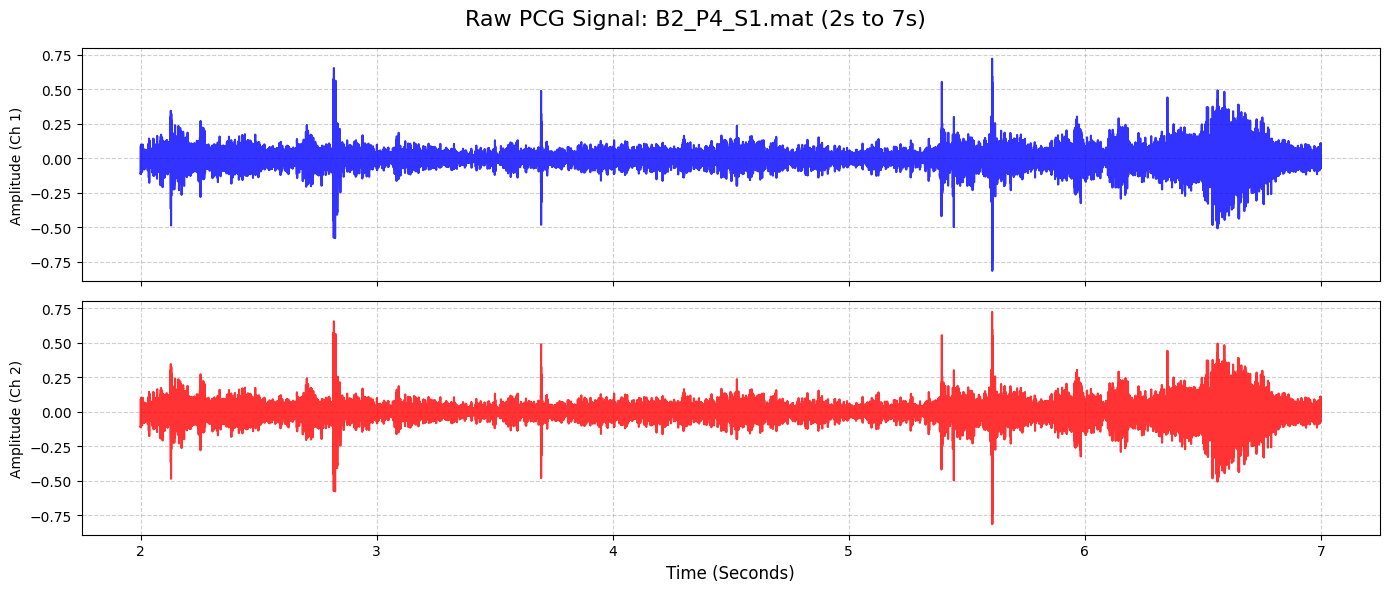

In [19]:
import matplotlib.pyplot as plt

def plot_pcg_segment(file_name, all_data, start_sec=0, end_sec=5):
    """Plots a specific time window of the PCG signal."""
    fs = all_data['Fs'].item()
    y = all_data['y']
    num_channels = y.shape[1]
    
    # Convert seconds to array indices
    start_idx = int(start_sec * fs)
    end_idx = int(end_sec * fs)
    
    # Slice the signal
    y_segment = y[start_idx:end_idx, :]
    time_axis = np.linspace(start_sec, end_sec, end_idx - start_idx)
    
    fig, axes = plt.subplots(num_channels, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(f"Raw PCG Signal: {file_name} ({start_sec}s to {end_sec}s)", fontsize=16)
    
    for ch in range(num_channels):
        axes[ch].plot(time_axis, y_segment[:, ch], color='b' if ch==0 else 'r', alpha=0.8)
        axes[ch].set_ylabel(f"Amplitude (Ch {ch+1})")
        axes[ch].grid(True, linestyle='--', alpha=0.6)
    
    axes[-1].set_xlabel("Time (Seconds)", fontsize=12)
    plt.tight_layout()
    plt.show()

# Test the plot on the first loaded file (Showing first 5 seconds)
sample_file = list(all_data.keys())[0]
plot_pcg_segment(sample_file, all_data[sample_file], start_sec=2, end_sec=7)

# **Convert the .mat signals into Spectrogram Images**

In [22]:
import os
import glob
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np

# 1. Folders
DATASET_PATH = '/kaggle/input/datasets/mubashirjawad01/raw-fetal-pcg-contaminated-with-mothers-pcg' 
IMAGE_SAVE_PATH = '/kaggle/working/spectrogram_images' # Save them to Kaggle working directory

os.makedirs(IMAGE_SAVE_PATH, exist_ok=True)

mat_files = glob.glob(os.path.join(DATASET_PATH, '**', '*.mat'), recursive=True)

print(f"Generating images for {len(mat_files)} files...")

for file_path in mat_files:
    file_name = os.path.basename(file_path).replace('.mat', '')
    
    # Load .mat
    mat_data = scipy.io.loadmat(file_path)
    fs = mat_data['Fs'].item()
    
    #  generate an image for Channel 0 as an example
    y = mat_data['y'][:, 0] 
    
    f, t, Sxx = spectrogram(y, fs, nperseg=2048, noverlap=1024)
    
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='magma')
    ax.set_ylim(0, 300) # focus on 0-300 Hz
    ax.axis('off') # Turn off axes
    
    # Save as PNG
    save_file = os.path.join(IMAGE_SAVE_PATH, f"{file_name}.png")
    plt.savefig(save_file, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

print("Spectrogram images saved to:", IMAGE_SAVE_PATH)

Generating images for 21 files...
Spectrogram images saved to: /kaggle/working/spectrogram_images


# **Frequency Analysis using a Spectrogram**

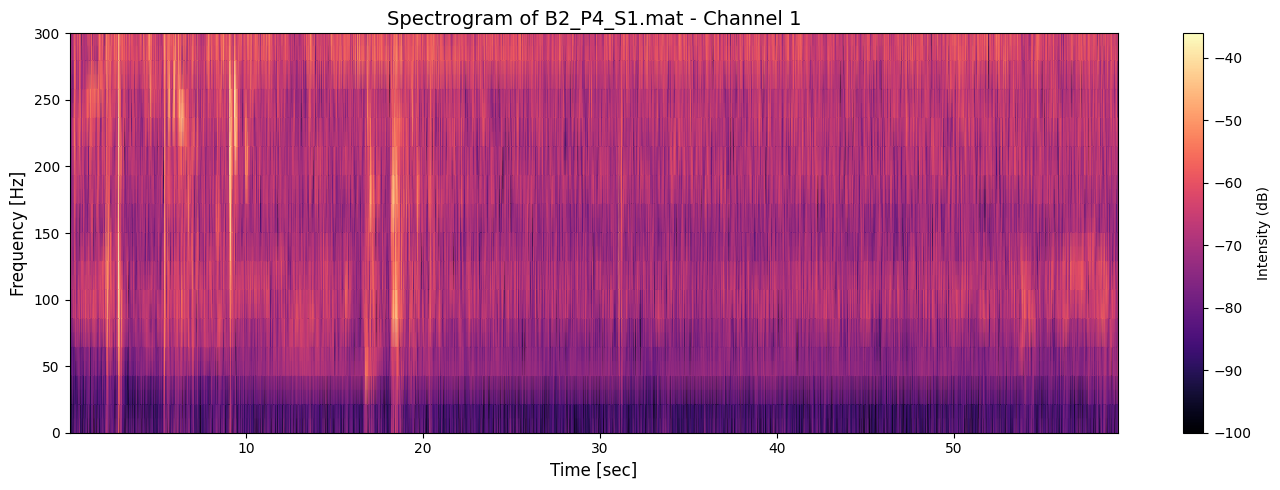

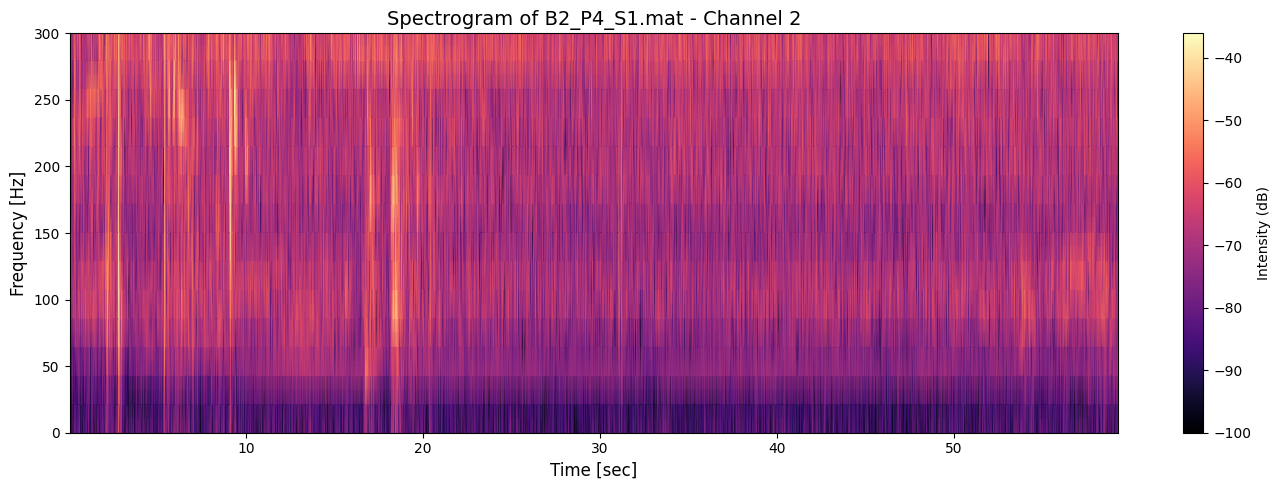

In [5]:
from scipy.signal import spectrogram

def plot_spectrogram(file_name, data, channel=0, max_freq=200):
    """Plots the spectrogram of a single channel."""
    fs = data['Fs'].item()
    y = data['y'][:, channel] 
    
    # Calculate spectrogram
    f, t, Sxx = spectrogram(y, fs, nperseg=2048, noverlap=1024)
    
    plt.figure(figsize=(14, 5))
    # Convert power to Decibels (dB) for better visualization
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='magma')
    
    # PCG energy is usually low-frequency, so we zoom in on 0 to max_freq Hz
    plt.ylim(0, max_freq) 
    plt.ylabel('Frequency [Hz]', fontsize=12)
    plt.xlabel('Time [sec]', fontsize=12)
    plt.title(f'Spectrogram of {file_name} - Channel {channel+1}', fontsize=14)
    plt.colorbar(label='Intensity (dB)')
    plt.tight_layout()
    plt.show()

# Plot spectrograms for both channels of the sample file
plot_spectrogram(sample_file, all_data[sample_file], channel=0, max_freq=300)
plot_spectrogram(sample_file, all_data[sample_file], channel=1, max_freq=300)